In [9]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# import sklearn
import sklearn


In [2]:
# import dataset 
df = pd.read_csv('dataset/student-mat.csv')

# print first 5 rows
df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# encode categorical data using label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [6]:
# looking for categorical data
categorial_data = df.select_dtypes(include=['object']).columns

# encode categorical data
for i in categorial_data:
    df[i] = le.fit_transform(df[i])

# print first 5 rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:>

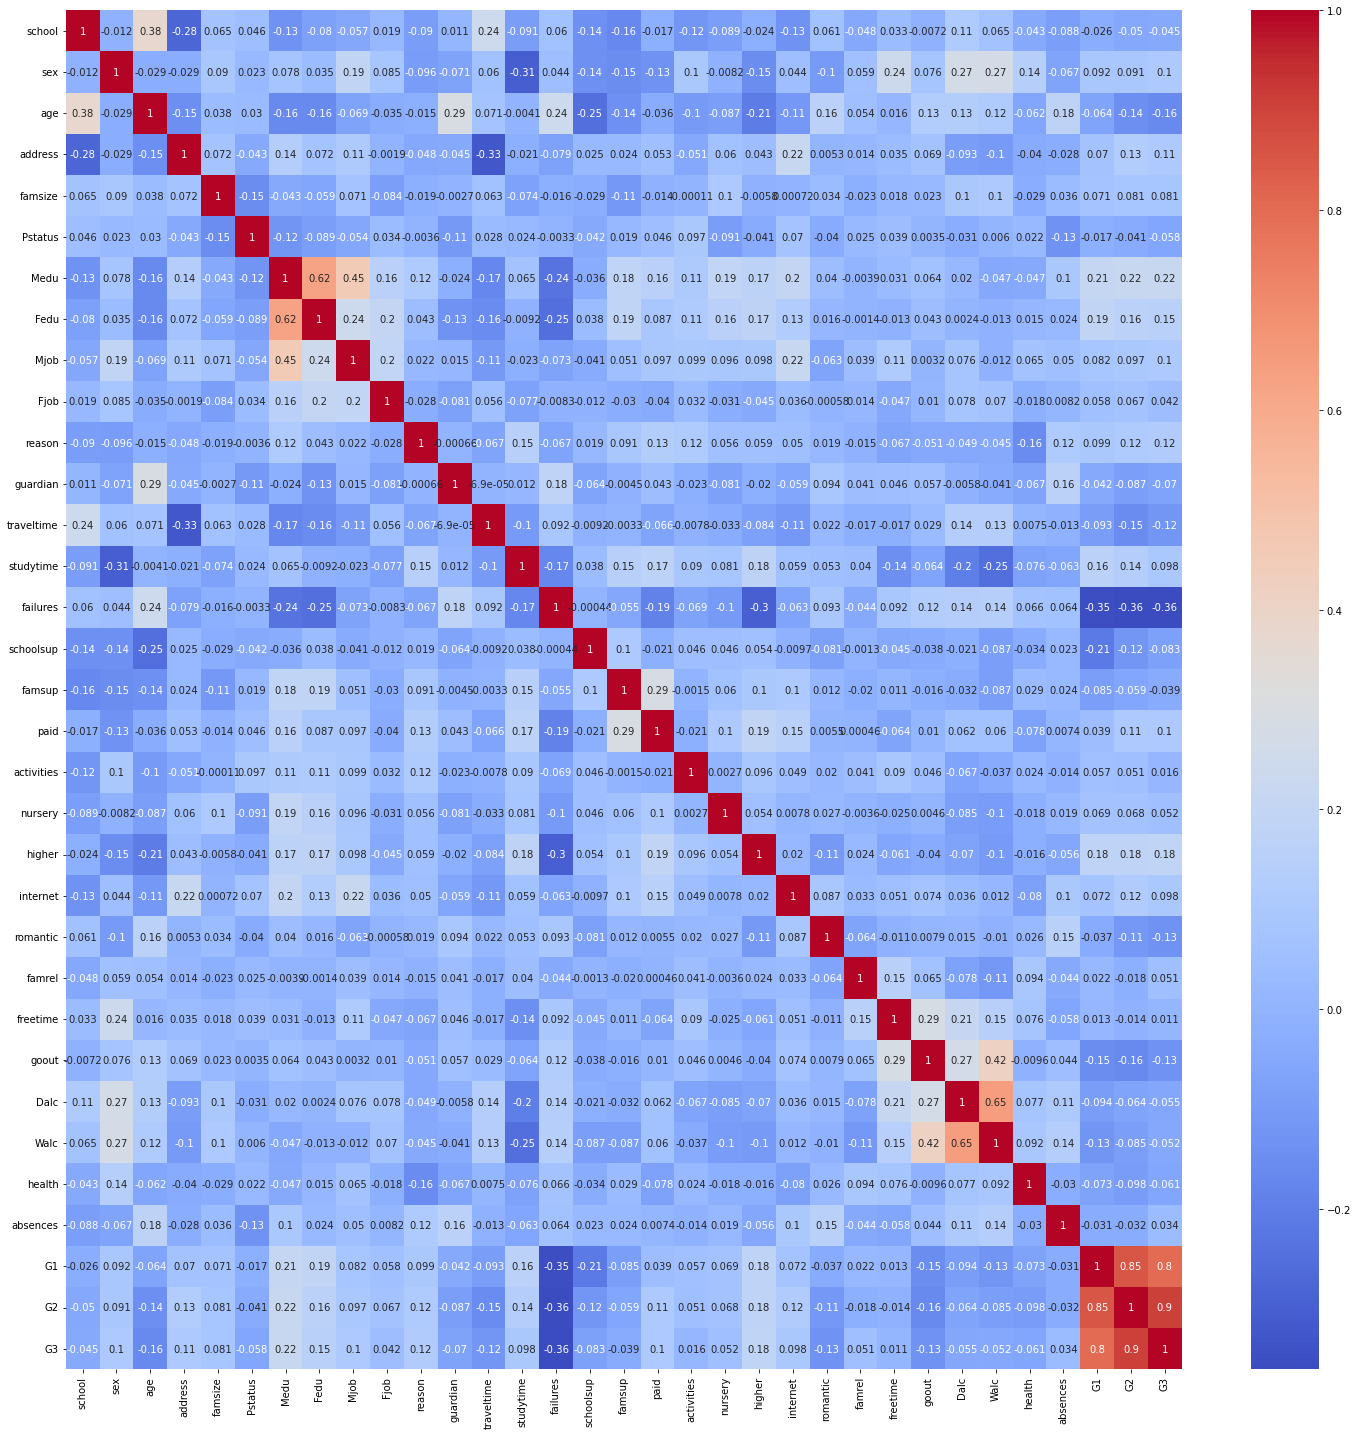

In [7]:
# looking coorelation between features
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



In [8]:
# select features and target
# x is 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
# y is 'G3'
X = df[['sex','address','famsize','Medu','Fedu','Mjob','Fjob','reason','studytime','paid','activities','nursery','higher','internet','famrel','freetime','absences','G1','G2']]
y = df['G3']

print(X)

     sex  address  famsize  Medu  Fedu  Mjob  Fjob  reason  studytime  paid  \
0      0        1        0     4     4     0     4       0          2     0   
1      0        1        0     1     1     0     2       0          2     0   
2      0        1        1     1     1     0     2       2          2     1   
3      0        1        0     4     2     1     3       1          3     1   
4      0        1        0     3     3     2     2       1          2     1   
..   ...      ...      ...   ...   ...   ...   ...     ...        ...   ...   
390    1        1        1     2     2     3     3       0          2     1   
391    1        1        1     3     1     3     3       0          1     0   
392    1        0        0     1     1     2     2       0          1     0   
393    1        0        1     3     2     3     2       0          1     0   
394    1        1        1     1     1     2     0       0          1     0   

     activities  nursery  higher  internet  famrel 

In [58]:
# normalize data

In [59]:
# make train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

,sex,address,famsize,Medu,Fedu,Mjob,Fjob,reason,studytime,paid,activities,nursery,higher,internet,famrel,freetime,absences,G1,G2
64,0,1,1,4,3,3,3,3,2,0,1,1,1,1,4,4,0,10,10
55,0,1,0,2,1,2,2,2,2,1,1,1,1,1,5,3,8,8,9
343,0,1,0,2,2,0,0,1,2,0,0,1,1,1,3,3,0,9,8
219,0,1,0,2,2,0,0,0,3,1,1,1,1,1,4,3,4,9,10
366,1,1,1,4,4,4,3,2,3,1,0,1,1,1,4,2,0,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,1,0,3,1,3,3,0,3,0,0,0,1,1,3,4,1,12,14
192,1,1,0,1,2,0,3,2,2,1,1,0,1,1,4,4,12,7,8
117,1,1,0,3,3,2,3,1,1,0,1,1,1,1,5,4,0,13,14
47,1,1,0,4,3,1,3,3,4,0,1,1,1,1,4,2,4,19,19


In [60]:
# import linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()



In [61]:
# make funtion to fit model and predict and print accuracy score, mean absolute error, mean squared error, and root mean squared error
def fit_predict(regressor):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('Accuracy Score: ', regressor.score(X_test, y_test))
    print('Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', sklearn.metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

# fit model and predict
fit_predict(regressor)


Accuracy Score:  0.807864859334662
Mean Absolute Error:  1.4072608575500276
Mean Squared Error:  5.3007871799454
Root Mean Squared Error:  2.3023438448558027


In [62]:
# make model using decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_leaf_nodes=99 ,random_state=1)
fit_predict(regressor)


Accuracy Score:  0.8151528456540648
Mean Absolute Error:  1.274080771549126
Mean Squared Error:  5.099720033583053
Root Mean Squared Error:  2.258255971669964


In [63]:
# make model using random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=1)
fit_predict(regressor)


Accuracy Score:  0.865815713605371
Mean Absolute Error:  1.1658227848101266
Mean Squared Error:  3.7019898734177215
Root Mean Squared Error:  1.924055579607232


In [64]:
# make model using gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=1)
fit_predict(regressor)


Accuracy Score:  0.8678304422689094
Mean Absolute Error:  1.2166116220749896
Mean Squared Error:  3.6464058306769185
Root Mean Squared Error:  1.9095564486751677


In [65]:
# make model using xgboost regressor
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state=1)
fit_predict(regressor)


Accuracy Score:  0.8517172075501828
Mean Absolute Error:  1.2628502086795206
Mean Squared Error:  4.090951413170075
Root Mean Squared Error:  2.0226100497055963


In [66]:
# make model using logistic regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=1)
fit_predict(regressor)


Accuracy Score:  0.25316455696202533
Mean Absolute Error:  2.3164556962025316
Mean Squared Error:  13.050632911392405
Root Mean Squared Error:  3.6125659732927238


c:\Users\sindu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# make model using ridge regression
from sklearn.linear_model import Ridge
regressor = Ridge(random_state=1)
fit_predict(regressor)

Accuracy Score:  0.8080646637811211
Mean Absolute Error:  1.4055697156008837
Mean Squared Error:  5.2952748054540955
Root Mean Squared Error:  2.301146411129482
